## Classification
https://www.kaggle.com/code/yunuscancengiz/heart-attack-analysis-prediction


Data Content
target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


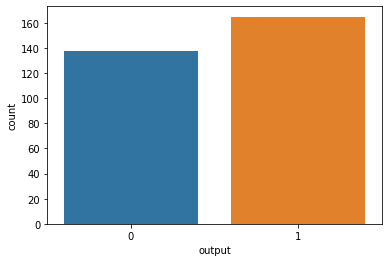

In [ ]:
sns.countplot(df['output'], label="count")

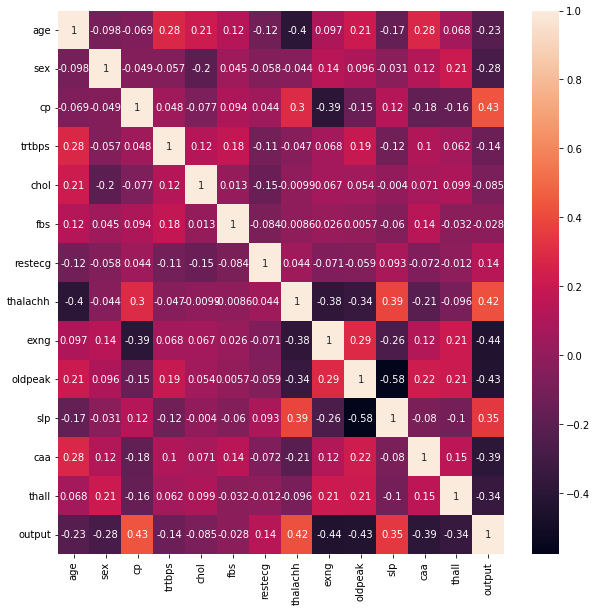

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df.drop(['output'], axis=1)
y = df['output']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [38]:
def models(x_train,y_train):
  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train,y_train)

  # Random forest 
  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier()
  rf.fit(x_train,y_train)

  # xgb
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train,y_train)

  print('lr: ', lr.score(x_train,y_train))
  print('rf: ', rf.score(x_train,y_train))
  print('xgb: ', xgb.score(x_train,y_train))
  return lr,rf,xgb


In [39]:
model = models(x_train,y_train)

lr:  0.8429752066115702
rf:  1.0
xgb:  0.9958677685950413


In [40]:
y_pred = model[1].predict(x_test)
print(y_pred)

[1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1]


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for i in range(len(model)):
  print('Model: ', i)
  print('Accuracy: ',accuracy_score(y_test, model[i].predict(x_test)))
  print(classification_report(y_test, model[i].predict(x_test)))
  print(confusion_matrix(y_test,model[i].predict(x_test)))

Model:  0
Accuracy:  0.8852459016393442
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

[[22  5]
 [ 2 32]]
Model:  1
Accuracy:  0.819672131147541
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

[[21  6]
 [ 5 29]]
Model:  2
Accuracy:  0.819672131147541
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy              

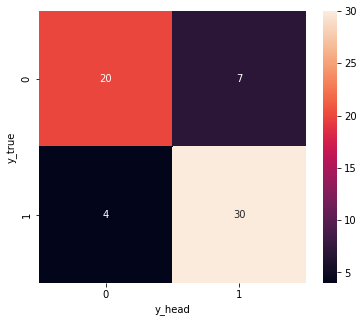

In [37]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()